In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_excel("datasets/Canada.xlsx", 
    sheet_name=1,
    skiprows=20,
    skipfooter=2,
)

In [ ]:
# set pandas to display all columns (optional)
pd.set_option('display.max_columns', None)

In [ ]:
df.head() # first 5 rows

In [ ]:
df.tail() # last 5 rows

check for null values

In [ ]:
df.isnull().sum()

Data in Dataframe can be of 
- Numeric Type
- Categorical Type (Repeating values either numeric or string)
- Unique Values only
- Only 1 value
- Date Type
- Boolean Type

DataTypes in Dataframe

` int, float, object, bool, datetime64, timedelta64`

T

In [ ]:
df.info()

In [ ]:
df.iloc[100:120] # rows 100 : 120

In [ ]:
df.sample(10) # random 10 rows

seperating data

In [ ]:
df.select_dtypes(include='number')

In [ ]:
df.select_dtypes(include='object')

In [ ]:
df.select_dtypes(include='object').nunique()

In [ ]:
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].unique()}")

In [ ]:
df['Coverage'].value_counts()

In [ ]:
cols_to_drop = ['Type', 'Coverage' ,'AREA', 'REG', 'DEV']
df = df.drop(columns=cols_to_drop)

rename columns

In [ ]:
df = df.rename(columns={
    'OdName': 'country',
    'AreaName' : 'continent',
    'RegName' : 'region',
    'DevName' : 'status',
})

sort data

In [ ]:
df.sort_values(by=2013, ascending=False) # descending

In [ ]:
df.sort_values(by='continent') # default ascending

add column

In [ ]:
years = range(1980, 2014)
df[years].sum(axis=1)  # horizontal sum

In [ ]:
df['total'] = df[years].sum(axis=1)

replacing value

In [ ]:
df['status'] = df['status'].replace('Developing regions', False)
df['status'] = df['status'].replace('Developed regions', True)
df = df.rename(columns={'status': 'developed'})

saving the processed data

In [ ]:
df.to_csv('datasets/canada_clean.csv', index=False)

# EDA (Exploratory Data Analysis) + Visualization

In [ ]:
df['developed'].value_counts()

In [ ]:
df['developed'].value_counts().plot(kind='pie', autopct='%.1f%%')

In [ ]:
sns.countplot(data=df, x='developed')

In [ ]:
df['developed'].value_counts().plot(kind='bar', backend='plotly')

In [ ]:
df.sort_values(by='total', ascending=False).head(10)[['country','total']]

creating a subset

In [ ]:
top10 = df.sort_values(
    by='total',
    ascending=False
).head(10)[['country','total']].copy()

- `Task 1`: Change the United Kingdom to UK in the Country column
- `Task 2`: Change Iran( Islamic Republic of) to Iran in the Country column
- `Task 3`: Create a bar chart for this

In [ ]:
top10.country.tolist()

In [ ]:
# task 1 and task 2 and Bonus
top10 = top10.replace('United Kingdom of Great Britain and Northern Ireland', 'UK')
top10 = top10.replace('Iran (Islamic Republic of)', 'Iran')
top10 = top10.replace("United States of America", "USA")
top10

<Axes: xlabel='total', ylabel='country'>

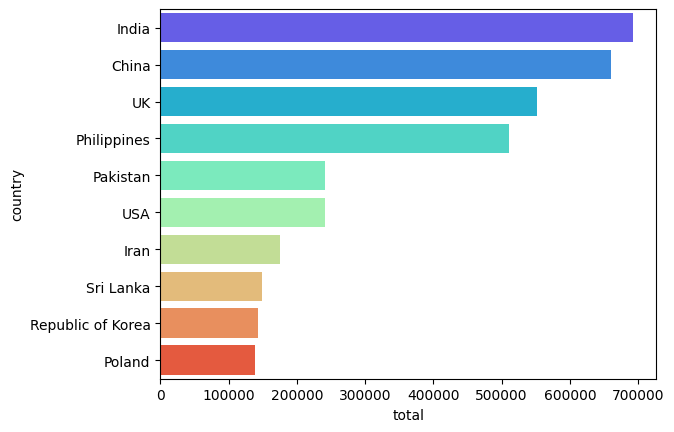

In [110]:
sns.barplot(data=top10, hue='country', y='country', x='total', 
            palette='rainbow', legend=False, orient='h')

#### Analayse the data from only last 5 years and show the visualization in area, bar